<a href="https://colab.research.google.com/github/Aminansari/ADS_HW8/blob/main/HW_8_Multiclass_%26_Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass, Multilabel and Boosting Classification
In this lab session, we first focus on performing *multiclass* classification. We practice using various classification techniques, as well as some boosting algorithms.

Later, we see how we can extend what we have learned to multilabel problems.

#About the Dataset
The dataset we work with in this lab session is about predicting the position of football players in FIFA 2019 game. The data is [hosted on Kaggle](https://www.kaggle.com/karangadiya/fifa19) and contains 88 features for 18207 players.

Our task would be to predict where in the field each player plays, hence dealing with a multiclass prediction problem.


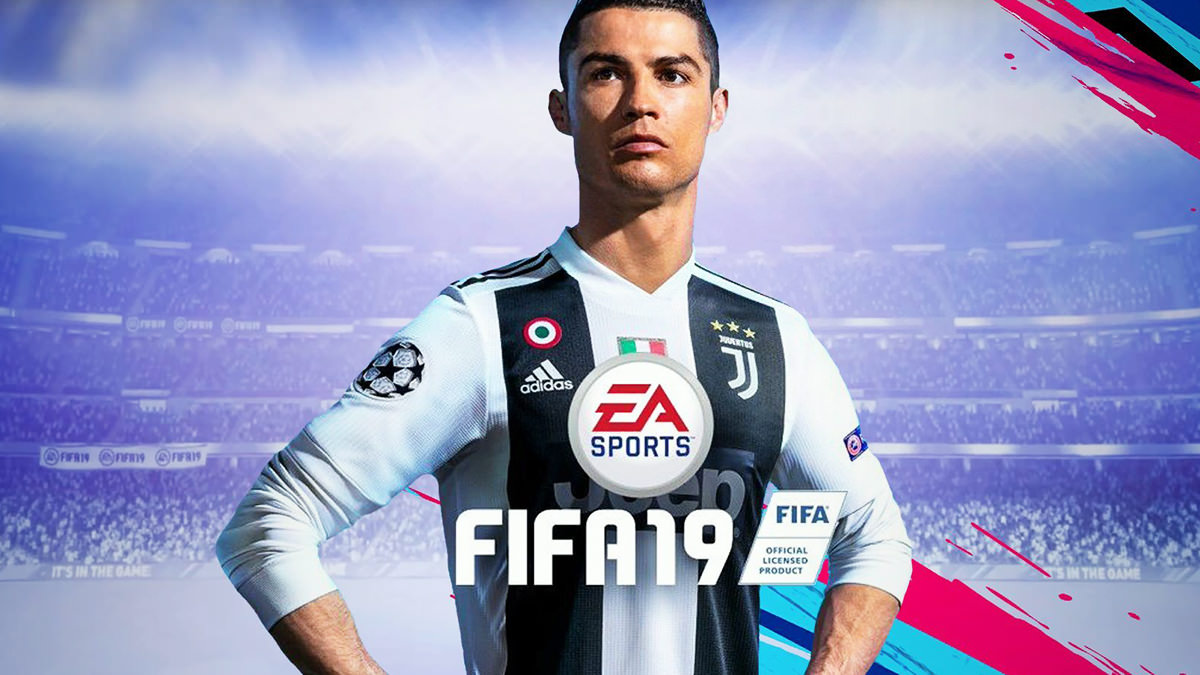

# Installing and Importing Libraries
For the examples we will work on in this notebook, we first need to upgrade the scikit-learn libraries.

Please note that **we will need to restart runtime** after executing the following block.

In [ ]:
# First, let's upgrade scikit-learn package in colab
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.9 MB/s eta 0:00:00
1.3.2


Now let's import the libraries we will need later on.

In [ ]:
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

# Loading the Dataset
Given the size, we load the data directly from Kaggle this time.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
! kaggle datasets download -d sujaypandit/fifa19-player-and-league-dataset

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 145MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  fifa19-player-and-league-dataset.zip
  inflating: Fifa19.csv              


Next step would be to load the CSV file into a Pandas dataframe.

In [ ]:
df = pd.read_csv('Fifa19.csv')
print(df.shape)

(16344, 89)


Now let's take a look at the first few rows of the data:

In [ ]:
df.head(10)

Club           Playing_in_League      ID          Name  Age  \
0  Real Madrid  Spain Primera Division (1)  177003     L. Modrić   32   
1  Real Madrid  Spain Primera Division (1)  155862  Sergio Ramos   32   
2  Real Madrid  Spain Primera Division (1)  182521      T. Kroos   28   
3  Real Madrid  Spain Primera Division (1)  192119   T. Courtois   26   
4  Real Madrid  Spain Primera Division (1)  200145      Casemiro   26   
5  Real Madrid  Spain Primera Division (1)  197781          Isco   26   
6  Real Madrid  Spain Primera Division (1)  176676       Marcelo   30   
7  Real Madrid  Spain Primera Division (1)  173731       G. Bale   28   
8  Real Madrid  Spain Primera Division (1)  193041      K. Navas   31   
9  Real Madrid  Spain Primera Division (1)  201535     R. Varane   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
1  https://cdn.sofifa.org/players/4/19/155862.png       Spain   
2  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
3  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   
4  https://cdn.sofifa.org/players/4/19/200145.png      Brazil   
5  https://cdn.sofifa.org/players/4/19/197781.png       Spain   
6  https://cdn.sofifa.org/players/4/19/176676.png      Brazil   
7  https://cdn.sofifa.org/players/4/19/173731.png       Wales   
8  https://cdn.sofifa.org/players/4/19/193041.png  Costa Rica   
9  https://cdn.sofifa.org/players/4/19/201535.png      France   

                                  Flag  Overall  Potential  ... Composure  \
0  https://cdn.sofifa.org/flags/10.png       91         91  ...      84.0   
1  https://cdn.sofifa.org/flags/45.png       91         91  ...      82.0   
2  https://cdn.sofifa.org/flags/21.png       90         90  ...      85.0   
3   https://cdn.sofifa.org/flags/7.png       89         90  ...      66.0   
4  https://cdn.sofifa.org/flags/54.png       88         90  ...      84.0   
5  https://cdn.sofifa.org/flags/45.png       88         91  ...      86.0   
6  https://cdn.sofifa.org/flags/54.png       88         88  ...      86.0   
7  https://cdn.sofifa.org/flags/50.png       88         88  ...      86.0   
8  https://cdn.sofifa.org/flags/72.png       87         87  ...      67.0   
9  https://cdn.sofifa.org/flags/18.png       86         91  ...      82.0   

  Marking StandingTackle  SlidingTackle GKDiving  GKHandling  GKKicking  \
0    60.0           76.0           73.0     13.0         9.0        7.0   
1    87.0           92.0           91.0     11.0         8.0        9.0   
2    72.0           79.0           69.0     10.0        11.0       13.0   
3    20.0           18.0           16.0     85.0        91.0       72.0   
4    88.0           90.0           87.0     13.0        14.0       16.0   
5    60.0           64.0           51.0     10.0         8.0       12.0   
6    71.0           85.0           86.0     12.0         5.0        5.0   
7    54.0           55.0           52.0     15.0        15.0       11.0   
8    28.0           14.0           14.0     90.0        81.0       75.0   
9    87.0           88.0           87.0     11.0        11.0        9.0   

   GKPositioning GKReflexes Release Clause  
0           14.0        9.0        €137.4M  
1            7.0       11.0        €104.6M  
2            7.0       10.0        €156.8M  
3           86.0       88.0        €113.7M  
4           12.0       12.0        €126.4M  
5           15.0        6.0        €156.2M  
6            5.0        9.0         €88.2M  
7            5.0        6.0          €123M  
8           82.0       90.0         €62.5M  
9            5.0       14.0        €106.3M  

[10 rows x 89 columns]

And here's a summary of the dataset as a whole.
It shows us the columns, their datatype, and how many values in that column are null (empty/missing data). Thankfully, we don't have any missing values!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      16344 non-null  object 
 1   Playing_in_League         16344 non-null  object 
 2   ID                        16344 non-null  int64  
 3   Name                      16344 non-null  object 
 4   Age                       16344 non-null  int64  
 5   Photo                     16344 non-null  object 
 6   Nationality               16344 non-null  object 
 7   Flag                      16344 non-null  object 
 8   Overall                   16344 non-null  int64  
 9   Potential                 16344 non-null  int64  
 10  Club Logo                 16344 non-null  object 
 11  Value                     16344 non-null  object 
 12  Wage                      16344 non-null  object 
 13  Special                   16344 non-null  int64  
 14  Prefer

# Getting Some Insights from Our Data
It is now time to do some EDA! We just play with different data columns to get more sense about our data.

First, let's check the distribution of palyers age

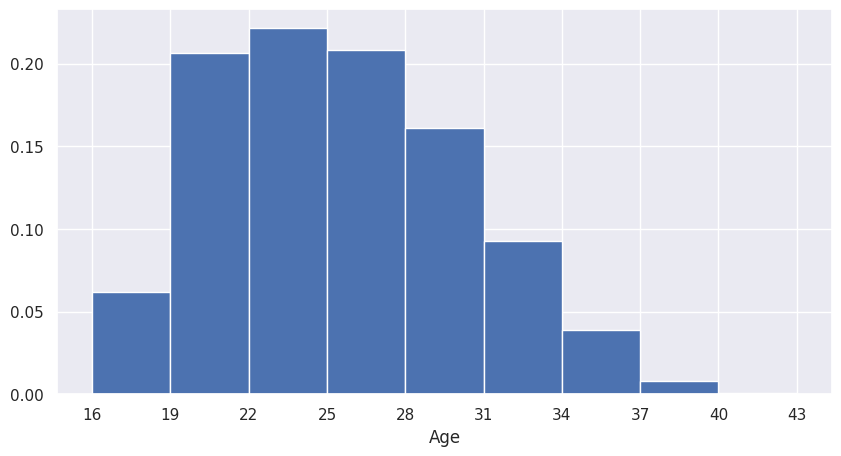

In [ ]:
# Setup bins
no_bins = 10
min_bin_value = int(df['Age'].min())
max_bin_value = int(df['Age'].max())+1
no_data_points = df.shape[0]
predefined_bins = list(range(min_bin_value,max_bin_value,int((max_bin_value-min_bin_value)/no_bins)))

# Create the histogram
df['Age'].hist(bins=predefined_bins,figsize=(10,5),weights=np.ones(no_data_points) /no_data_points)

# Now let's setup the labels, titles and format y axis as percentages
plt.xlabel('Age')
plt.xticks(predefined_bins)
plt.show()

Next, let's see the pairplot of some of the columns and how they correlate with the position.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


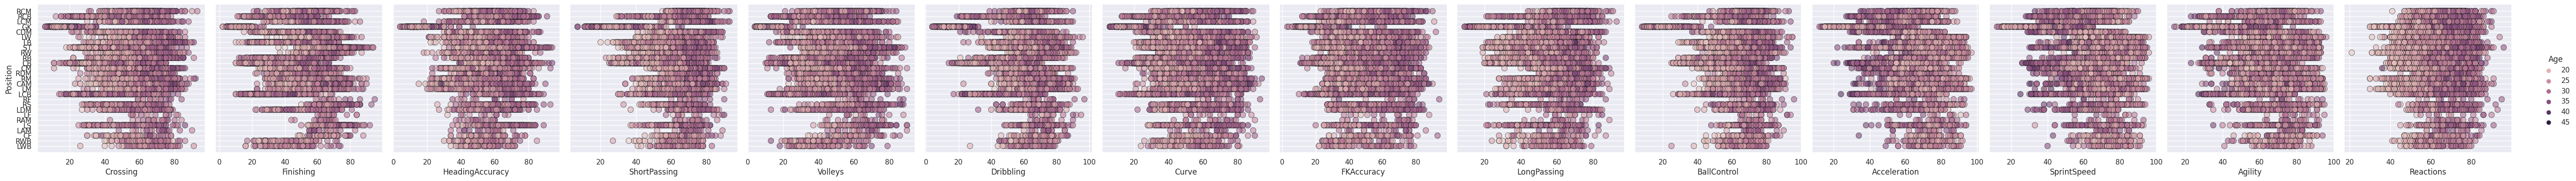

In [ ]:
cols_to_plot = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                'Acceleration','SprintSpeed','Agility','Reactions']

sns.pairplot(data=df,
                  y_vars=['Position'],
                  x_vars=cols_to_plot,
                  hue='Age',
                  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                  size = 4)

Finally, let's check the distribution of positions:

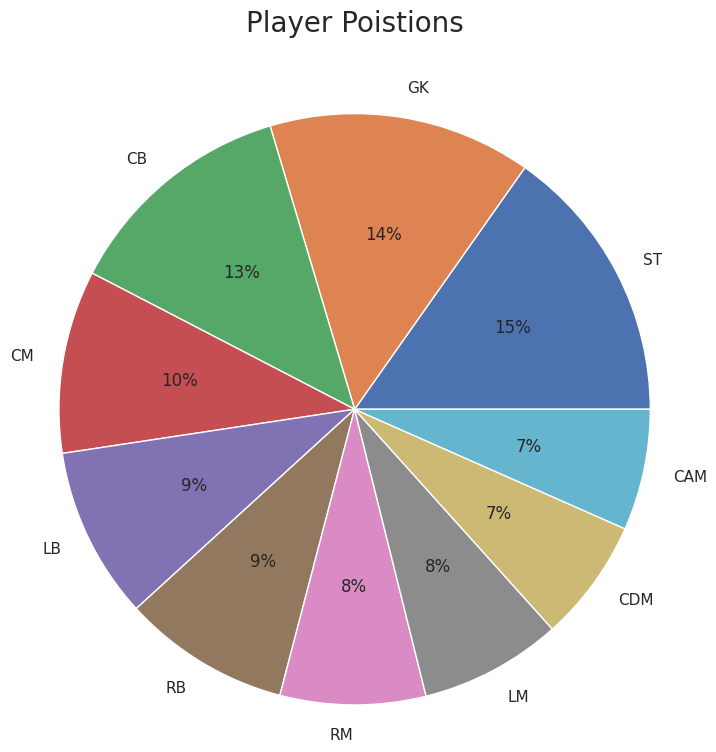

In [ ]:
df['Position'].value_counts()[0:10].plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Player Poistions', y=1.5,fontsize=20)
plt.show()

In [ ]:
print('Total number of unique positions: %d' %len(df['Position'].unique()))

Total number of unique positions: 28


In [ ]:
df['Position'].unique()

array(['RCM', 'RCB', 'LCM', 'GK', 'CDM', 'LW', 'LB', 'ST', 'RW', 'RB',
       'CB', 'CM', 'RDM', 'RM', 'CAM', 'LM', 'LCB', 'RF', 'RS', 'LDM',
       'LF', 'RAM', 'LS', 'LAM', 'CF', 'RWB', nan, 'LWB'], dtype=object)

It seems we have too many positions! We can combine some of them together to simplify the problem:

In [ ]:
# We go for a 4-3-3 formation!
df.loc[df['Position']=='ST','Position']='CF'              # All strickers are now counte as Central Forward (CF)
df.loc[df['Position']=='RS','Position']='RF'              # All right strikers are counted as Right Forward (RF)
df.loc[df['Position']=='LS','Position']='LF'              # All left strikers are counted as Left Forward (RF)

# Midfield
df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'      # All variants right Middfieldsers (i.e. attacking and defending) are now counted as right middfielders
df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'      # All variants left Middfieldsers (i.e. attacking and defending) are now counted as left middfielders
df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'              # All central midfielders grouped together

# Defense
df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'      # All variants right defenders (i.e. wing and wing back) are now counted as right defenders
df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'      # All variants Left defenders (i.e. wing and wing back) are now counted as left defenders

In [ ]:
print('Total number of unique positions: %d' %len(df['Position'].unique()))

Total number of unique positions: 12


In [ ]:
df['Position'].unique()

array(['RM', 'RCB', 'LM', 'GK', 'CM', 'LB', 'CF', 'RB', 'LCB', 'RF', 'LF',
       nan], dtype=object)

# Data Cleaning
From the above overview, we saw some rows with null values. To save time, we simply drop them here.

In [ ]:
for col_name in list(df.columns):
  no_null_values = sum(df[col_name].isnull())
  if no_null_values:
    print('Number of null values in column %s is %d' %(col_name,no_null_values))

Number of null values in column Preferred Foot is 40
Number of null values in column International Reputation is 40
Number of null values in column Weak Foot is 40
Number of null values in column Skill Moves is 40
Number of null values in column Work Rate is 40
Number of null values in column Body Type is 40
Number of null values in column Real Face is 40
Number of null values in column Position is 40
Number of null values in column Jersey Number is 40
Number of null values in column Joined is 1174
Number of null values in column Loaned From is 15210
Number of null values in column Contract Valid Until is 40
Number of null values in column Height is 40
Number of null values in column Weight is 40
Number of null values in column LS is 1859
Number of null values in column ST is 1859
Number of null values in column RS is 1859
Number of null values in column LW is 1859
Number of null values in column LF is 1859
Number of null values in column CF is 1859
Number of null values in column RF i

In [ ]:
# First, drop the columns with many null values
df.drop(['Loaned From'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(13425, 88)

# Feature Engineering
It would be nice to do some feature engineering before moving to the regression phase.

However, in the interest of time, and since we seem to have sufficient columns, we bypass this step.

# Data Preprocessing
Next step in preparing our data would be to make all columns have numerical values.


In [ ]:
df.select_dtypes(include = "object").columns

Index(['Club', 'Playing_in_League', 'Name', 'Photo', 'Nationality', 'Flag',
       'Club Logo', 'Value', 'Wage', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Joined', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

First, let's convert the skill scores to numbers

In [ ]:
df['LS'].head()

0    77+3
1    73+3
2    78+3
4    72+3
5    76+3
Name: LS, dtype: object

In [ ]:
skills_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
                  'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
                  'LB','LCB','CB','RCB','RB']
for col_name in skills_columns:
  df[col_name] = df[col_name].str.split('+').str[0]
  df[col_name] = df[col_name].astype(int)

Now let's drop unnecessary columns:

In [ ]:
df_orig = copy.deepcopy(df)
to_drop_columns = ['Name','Photo','Playing_in_League','Nationality','Flag','Club','Club Logo','Real Face','Joined','Contract Valid Until']
df.drop(to_drop_columns, axis=1, inplace=True)

The "Value" column has also currency signs and the numbers are in the form of#

*   €110.5M,
*   €77M
*   €118.5M
*   ...
we define a function and apply it to the column to make it numerical.
  



In [ ]:
  def convert_currency_to_number(x):
      output = x.replace('€','')
      if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1e6
      elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1e3
      output = float(output)
      return output

In [ ]:
df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

We face a similar situation for height and weight

In [ ]:
  def convert_height_to_number(x):
      output = x.replace("'",'.')
      return float(output)* 30.48

In [ ]:
df['Height'] = df['Height'].apply(convert_height_to_number)

In [ ]:
  def convert_weight_to_number(x):
      output = x.replace("lbs",'')
      return float(output)* .4205

In [ ]:
df['Weight'] = df['Weight'].apply(convert_weight_to_number)

Now let's see what other columns we have with non-numeric values

In [ ]:
for col_name in list(df.select_dtypes(include = "object").columns):
  print('Number of unique values in column %s is %d\n' %(col_name,len(df[col_name].unique())))

Number of unique values in column Preferred Foot is 2

Number of unique values in column Work Rate is 9

Number of unique values in column Body Type is 9

Number of unique values in column Position is 10



Given that the range of unique values for each column is not that large, let's use one-hot encoding.


In [ ]:
target_positions = df.pop('Position')
to_one_hot_columns = list(df.select_dtypes(include = "object").columns)
onehot_column_names = []
for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column])
    df[encoded_df.columns] = encoded_df     # Insert the newly encoded columns into the dataset
    onehot_column_names += list(encoded_df.columns)
df.head()

ID  Age  Overall  Potential       Value      Wage  Special  \
0  177003   32       91         91  67000000.0  420000.0     2280   
1  155862   32       91         91  51000000.0  380000.0     2201   
2  182521   28       90         90  76500000.0  355000.0     2190   
4  200145   26       88         90  59500000.0  285000.0     2170   
5  197781   26       88         91  73500000.0  315000.0     2137   

  Preferred Foot  International Reputation  Weak Foot  ...  Medium/ Medium  \
0          Right                       4.0        4.0  ...               0   
1          Right                       4.0        3.0  ...               0   
2          Right                       4.0        5.0  ...               1   
4          Right                       3.0        3.0  ...               0   
5          Right                       3.0        3.0  ...               0   

  Akinfenwa C. Ronaldo  Lean  Messi  Neymar  Normal  PLAYER_BODY_TYPE_25  \
0         0          0     1      0       0       0                    0   
1         0          0     0      0       0       1                    0   
2         0          0     0      0       0       1                    0   
4         0          0     0      0       0       1                    0   
5         0          0     0      0       0       1                    0   

   Shaqiri  Stocky  
0        0       0  
1        0       0  
2        0       0  
4        0       0  
5        0       0  

[5 rows x 97 columns]

The "Body Type" column has some very weird values in it!!

In [ ]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri',
       'Messi', 'C. Ronaldo', 'Neymar', 'Akinfenwa'], dtype=object)

In [ ]:
# Let's drop non-numeric columns
df.drop(to_one_hot_columns, axis=1, inplace=True)

In [ ]:
# Let's remove white spaces fro column names, as this will cause some errors in plotting the decision trees later on
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

### Normalization/Stadardization
Our next step would be to "normalize" all the columns so thatthey have a "similar" range. To this end, we will use scikit-learn's SatndardScaler, to make the selected columns have the normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = list(set(df.columns) - set(onehot_column_names))
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

Jumping           LCB   Positioning     ShotPower    C._Ronaldo  \
count  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04   
mean   6.097171e-16 -2.286439e-16 -3.387317e-17  1.693659e-16  3.175610e-18   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min   -3.301034e+00 -2.627939e+00 -2.971789e+00 -3.382653e+00 -8.630958e-03   
25%   -6.187272e-01 -8.444011e-01 -5.988917e-01 -6.646214e-01 -8.630958e-03   
50%    7.348107e-02  1.747637e-01  1.468759e-01  9.038735e-02 -8.630958e-03   
75%    6.791633e-01  7.692765e-01  6.892524e-01  7.698952e-01 -8.630958e-03   
max    2.496210e+00  2.637745e+00  2.723164e+00  2.657417e+00  1.158620e+02   

                CDM  Acceleration           LAM    GKReflexes  SlidingTackle  \
count  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04   1.342500e+04   
mean   2.371122e-16  4.488195e-16  2.371122e-16 -1.508415e-16   7.621464e-17   
std    1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   1.000037e+00   
min   -2.861815e+00 -4.052449e+00 -3.263364e+00 -3.058377e+00  -2.098492e+00   
25%   -6.997294e-01 -5.009953e-01 -6.193831e-01 -8.051098e-01  -8.959305e-01   
50%    8.648341e-02  9.091369e-02  9.245790e-02 -1.613193e-01   3.066314e-01   
75%    7.744196e-01  6.828226e-01  7.026073e-01  8.043665e-01   7.771991e-01   
max    2.936505e+00  2.458549e+00  3.448280e+00  8.529853e+00   2.136617e+00   

       ...     Low/_High            ID            LW     Dribbling  \
count  ...  1.342500e+04  1.342500e+04  1.342500e+04  1.342500e+04   
mean   ...  5.292683e-19 -1.693659e-16 -1.863025e-16  8.468293e-17   
std    ...  1.000037e+00  1.000037e+00  1.000037e+00  1.000037e+00   
min    ... -1.657585e-01 -7.225191e+00 -3.436271e+00 -3.717993e+00   
25%    ... -1.657585e-01 -4.938082e-01 -6.177502e-01 -4.540442e-01   
50%    ... -1.657585e-01  2.441610e-01  8.688003e-02  1.828238e-01   
75%    ... -1.657585e-01  7.706068e-01  6.908488e-01  6.604749e-01   
max    ...  6.032872e+00  1.099505e+00  3.308047e+00  2.889513e+00   

                RCB    FKAccuracy            ST  Medium/_High     High/_Low  \
count  1.342500e+04  13425.000000  1.342500e+04  1.342500e+04  1.342500e+04   
mean  -2.286439e-16      0.000000 -2.540488e-16  4.657561e-17  2.170000e-17   
std    1.000037e+00      1.000037  1.000037e+00  1.000037e+00  1.000037e+00   
min   -2.627939e+00     -2.419764 -2.934422e+00 -3.489145e-01 -2.064884e-01   
25%   -8.444011e-01     -0.834601 -6.439804e-01 -3.489145e-01 -2.064884e-01   
50%    1.747637e-01     -0.174117  1.043159e-02 -3.489145e-01 -2.064884e-01   
75%    7.692765e-01      0.816610  6.648436e-01 -3.489145e-01 -2.064884e-01   
max    2.637745e+00      3.128305  3.609697e+00  2.866032e+00  4.842887e+00   

                 CF  
count  1.342500e+04  
mean   1.354927e-16  
std    1.000037e+00  
min   -3.214914e+00  
25%   -5.875557e-01  
50%    1.198099e-01  
75%    7.261233e-01  
max    3.454533e+00  

[8 rows x 84 columns]

**Important Note**: In practice, it is better to perform normalization *after* we have separated data into train and test, and use only the train set for deriving normalization coefficient. The reason is that we supposedly do not have access to the test data.

# Pareparing Train and Test Sets
Let's break our data into train and test sets to better evaluate the performance of our algorithm.

In [ ]:
# First, let's separate the target column, price
y = target_positions

In [ ]:
y

0         RM
1        RCB
2         LM
4         CM
5         LB
        ... 
16337     LM
16338     LB
16340     CF
16341     LB
16343     CF
Name: Position, Length: 13425, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(9397, 94)
(4028, 94)


# Classification
Now it is time to test classification algorithms in action, starting from linear classifiers.

### Support Vector Machines (SVM)
In the [lecture](https://docs.google.com/presentation/d/18I85eEFIkO10tq8DT2oadDAQ_CytMEY0Sz59DO6KKy8/edit?usp=sharing) we saw how we can reformulate the multiclass classification problem into several binary classification problems, and use SVMs to solve the problem.

We saw two main startegies:


*   One-vs-One (OVO): compare each pair of classes to each other, and then combine the results to reach a verdict.
*   One-vs-Rest (OVR): compare each class to the rest of classes, and then decide best on the overall results.

The first strategy is very computationally expensive (it needs $O(k^2)$ classifiers, $k$ being the number of classes). So we proceed with the first approach.



In [ ]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='linear',decision_function_shape = "ovr",max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=2, kernel='linear', max_iter=5000)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.31


Let's also try SVM with nonlinear kernels

In [ ]:
model = SVC(C=2,kernel='poly',decision_function_shape = "ovr",max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

# Predict the results
predictions = model.predict(X_test)

# Evaluate the score
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Macro F1-score is 0.34


In [ ]:
model = SVC(C=2,kernel='rbf',decision_function_shape = "ovr",max_iter=5000)    # C > 0 means we are having some l2-regularization  penalty
model.fit(X_train, y_train)

# Predict the results
predictions = model.predict(X_test)

# Evaluate the score
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.36


A Confusion matrix could help us see which classes are being misclassified most:

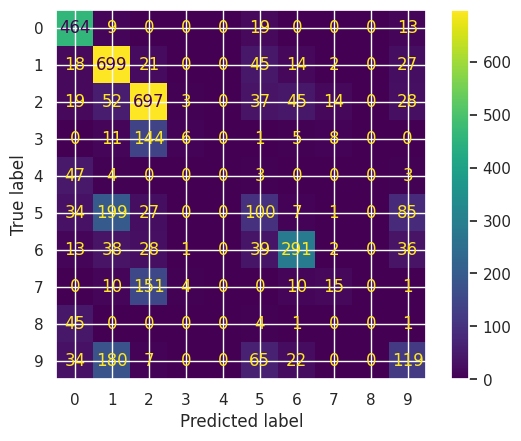

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)#, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#display_labels=classifier.classes_)
disp.plot()

### Logistic Regression
In the [lecture](https://docs.google.com/presentation/d/18I85eEFIkO10tq8DT2oadDAQ_CytMEY0Sz59DO6KKy8/edit?usp=sharing) we saw several strategies that help us use logistic regression for multiclass problems as well:


*   One-vs-One (as discussed above)
*   One-vs-Rest (as discussed above)
*   Multinomial: extending the binary classification problem help us reformulate it for the multiclass case, resulting in log loss as the objective function.

We will see how we can use scikit-learn's module to implement the last two approaches.



In [ ]:
# Diable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none',max_iter=400,multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='ovr', penalty='none')

Now let's check its score on the test set:

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.37


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

(0.4306598495736383, 0.3856882149145933, 0.37222253524303645, None)

Now let's check the performance with 'multinomial' reformulation:

In [ ]:
model = LogisticRegression(penalty='none',max_iter=400,multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='multinomial', penalty='none')

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.38


Let's also test the perormance of logistic regression with some regularization:

In [ ]:
model = LogisticRegression(penalty='l2',C=10,max_iter=400,multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.37


### K-Nearest Neighbors
K Nearest Neighbor is another algorithm that can be applied to multiclass classification problems.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6,weights='distance')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score on Training set is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score on Training set is 0.30


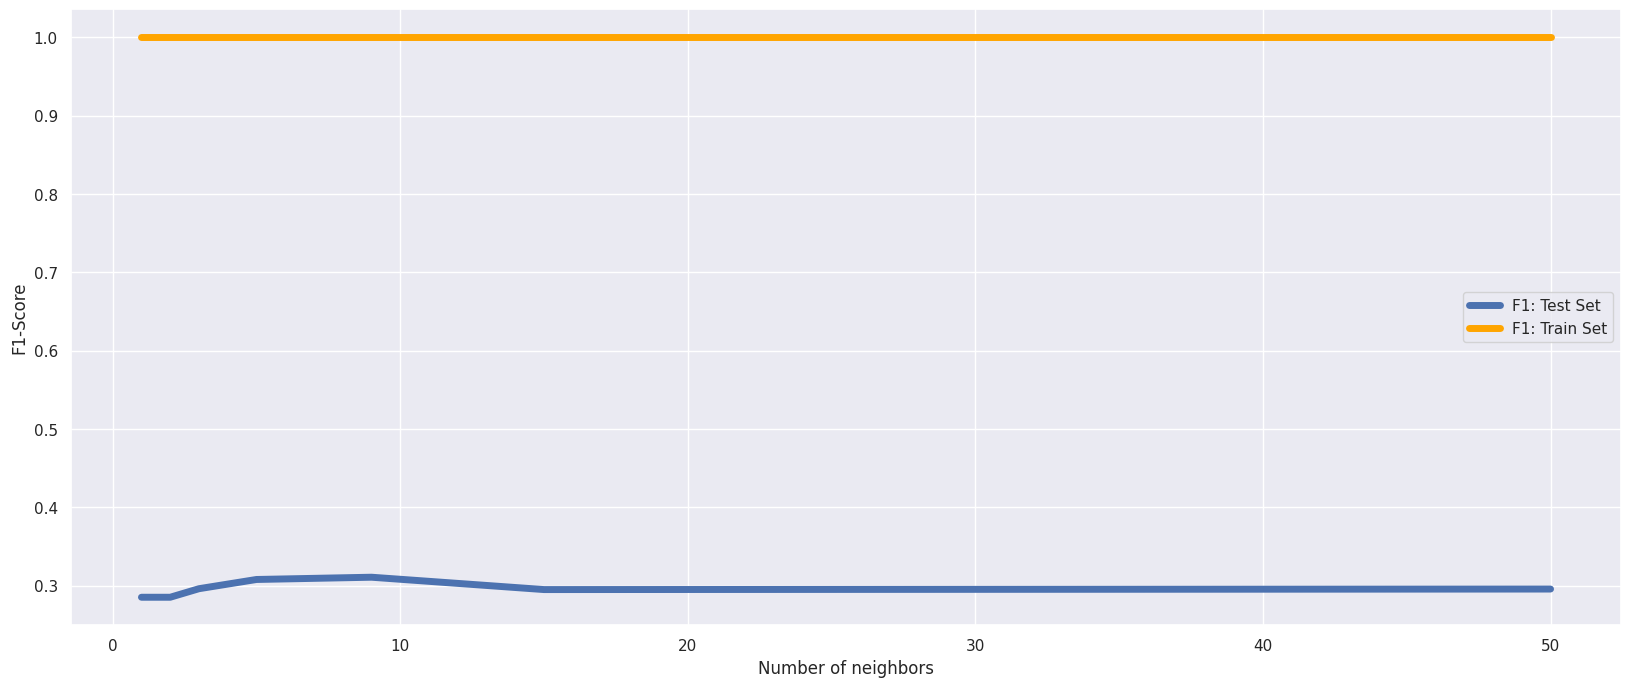

In [ ]:
scores = []
neighbors_list = [1,2,3,5,9,15,50]
scores = []
scores_train = []
for n in neighbors_list:

    # Create the model
    model = KNeighborsClassifier(n_neighbors=n,weights='distance')
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(neighbors_list,scores,lw=5)
plt.plot(neighbors_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of neighbors')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


### Decision Tree
Decision trees are another very popular choice for performing classification (and regression) among data scientists.

In principle, they use yes/no questions to decide the correct class of a given data point. At each step (i.e. decision node) they select a feature (i.e. question) and a cutoff which results in the most information gain possible to divide the dataset into two parts (child nodes). This step is repeated until either the maximum depth of the tree is reached, or all leaf nodes have just one data point (and hence, one class) left.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
predictions = model.predict(X_train)
print('Macro F1-score on Training set is %.2f' %f1_score(y_train, predictions, average='macro'))

Macro F1-score on Training set is 0.61


As expected, decision trees perform very well on the training set. But what about the test set?

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.36


#### Effect of Criterion
Decision trees usually use one of the two popular choices for measuring information gain:

*   Gini impurity index
*   Entropy

Does these two option have an effect on the performance? Let's test it out:

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.35


#### Effect of Max-Depth (Accuracy vs. Overfitting)
An important parameter that affects the performance of a decision tree is its maximum depth: setting too low will results in a not so accurate decision tree. On the other hand, if it is too high, the decision tree will overfit on the training set and perform poorly on the test set.

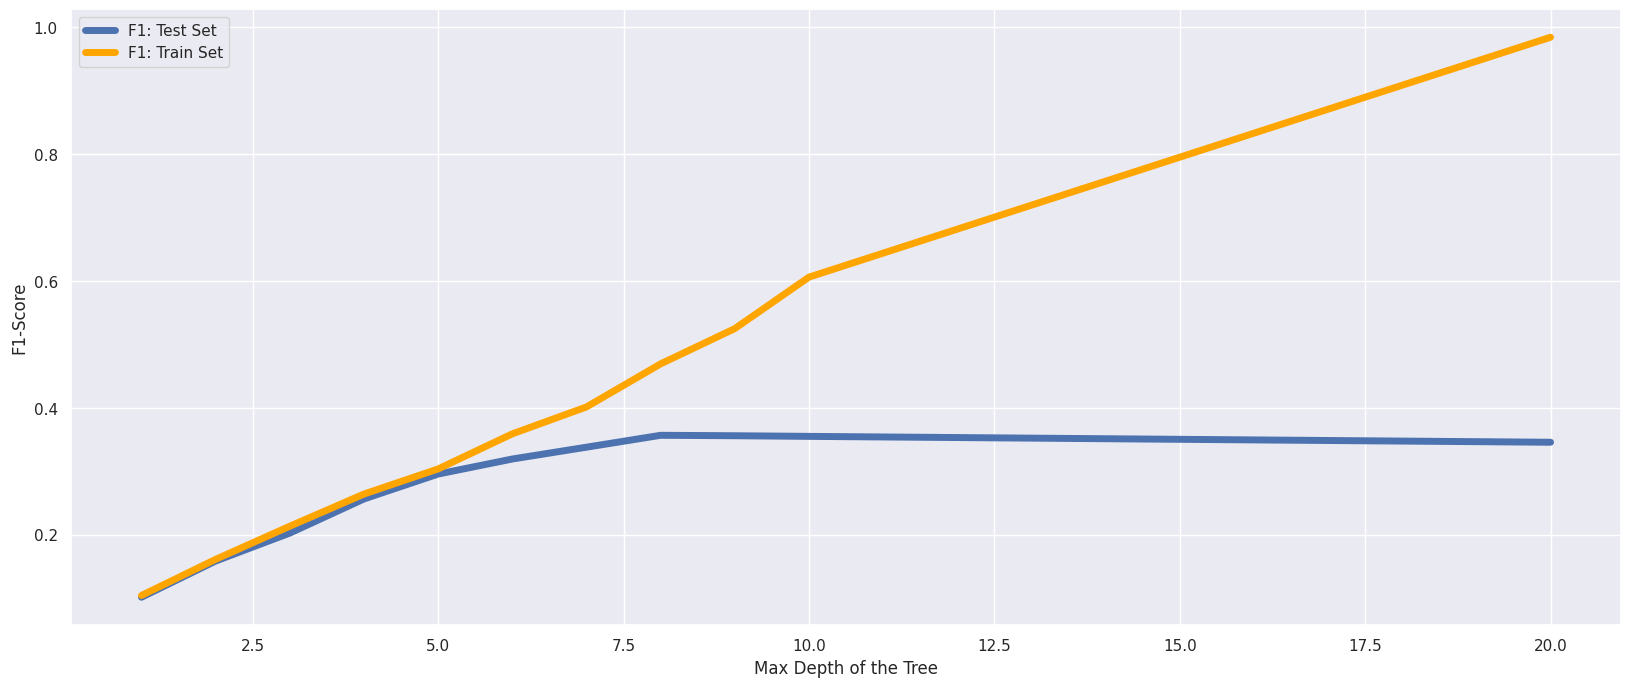

In [ ]:
scores = []
depths_list = [1,2,3,4,5,6,7,8,9,10,20]
scores = []
scores_train = []
for depth in depths_list:

    # Create the model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(depths_list,scores,lw=5)
plt.plot(depths_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


#### Visualizing the Tree
A very desirable properties of decision trees is that once they are trained, their decision mechanism, i.e. the acutal "decision tree", can be displayed and visualized very nicely. This will enable us to better understand what factors and criteria have contributed to the final decision made by the algorithm.

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier(max_features=50,max_depth=2,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=50)

[Text(0.5, 0.8333333333333334, 'SlidingTackle <= -0.086\nentropy = 2.926\nsamples = 9397\nvalue = [1296, 1921, 2119, 363, 128, 1000, 1025, 370, 126\n1049]'),
 Text(0.25, 0.5, 'HeadingAccuracy <= -0.489\nentropy = 2.59\nsamples = 3664\nvalue = [1265, 625, 218, 1, 124, 556, 191, 1, 119, 564]'),
 Text(0.125, 0.16666666666666666, 'entropy = 2.527\nsamples = 1594\nvalue = [150, 441, 145, 1, 13, 360, 116, 0, 19, 349]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.239\nsamples = 2070\nvalue = [1115, 184, 73, 0, 111, 196, 75, 1, 100, 215]'),
 Text(0.75, 0.5, 'Vision <= -0.239\nentropy = 2.571\nsamples = 5733\nvalue = [31, 1296, 1901, 362, 4, 444, 834, 369, 7, 485]'),
 Text(0.625, 0.16666666666666666, 'entropy = 2.108\nsamples = 2548\nvalue = [2, 197, 1293, 278, 0, 41, 426, 270, 1, 40]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.524\nsamples = 3185\nvalue = [29, 1099, 608, 84, 4, 403, 408, 99, 6, 445]')]

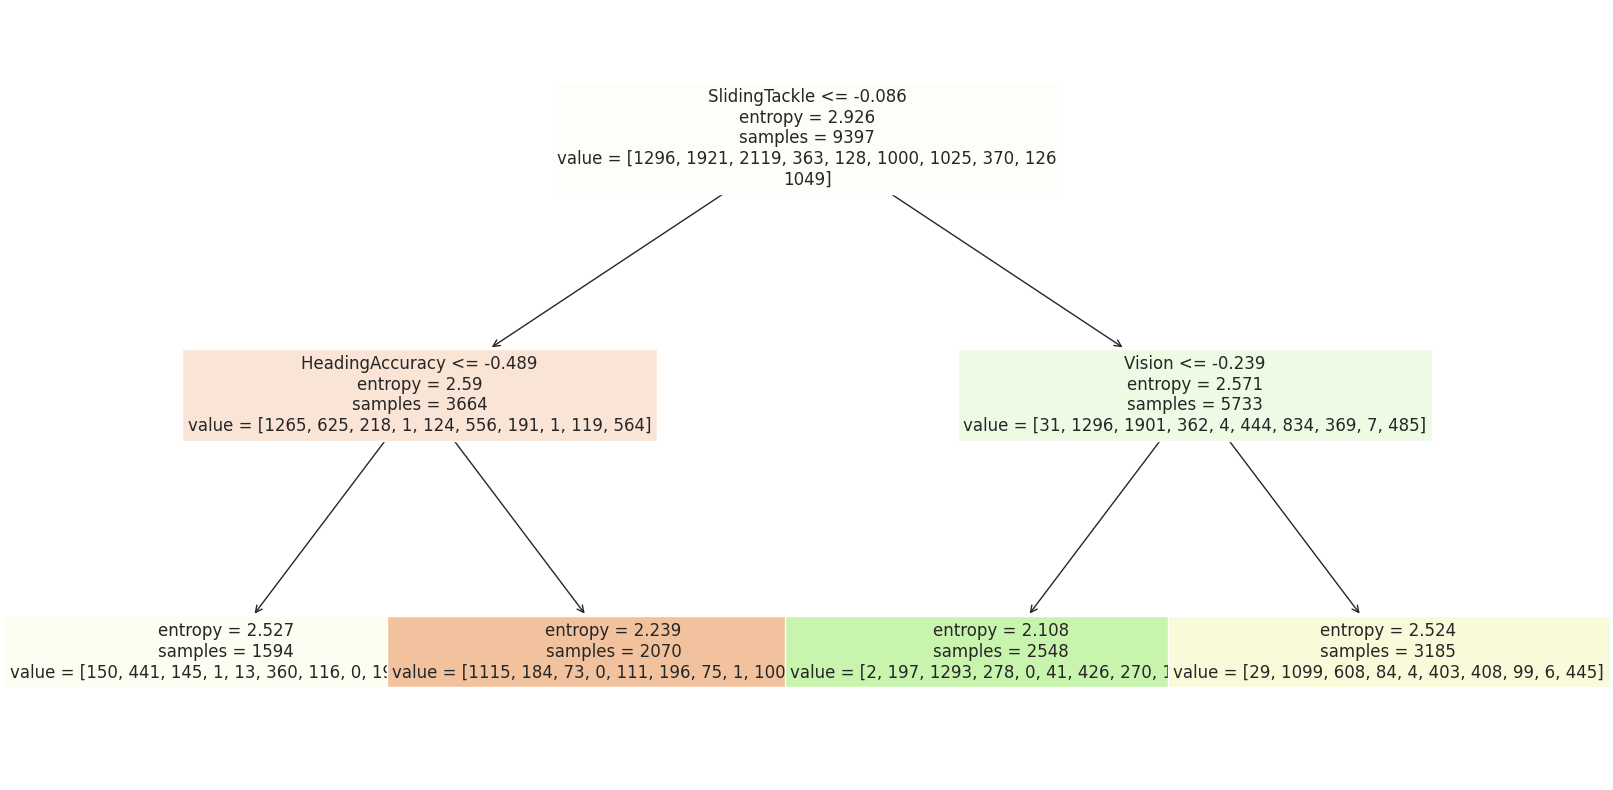

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
tree.plot_tree(model,feature_names = df.columns, filled = True,fontsize=12)

### Random Forests
Instead of training one decision tree, we can train several instances, and then aggregate the results to improve the accuracy and robustness of the final algorithm, as is customary with *ensemble learning* approaches.

This algorithm is called random forests and easily implemented using the corresponding scikit-learn module.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=10,)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.34


Let's check the feature importances here as well.

### Effect of n_estimators
One of the most important parameters of the random forests is the number of decision trees we want to train. If this number (a.k.a. n_estimators) is 1, we are basically dealing with a single decision tree. A higher number should lead to better predictions. But it comes at a higher computational cost. So it is better to find a nice balance as usual:

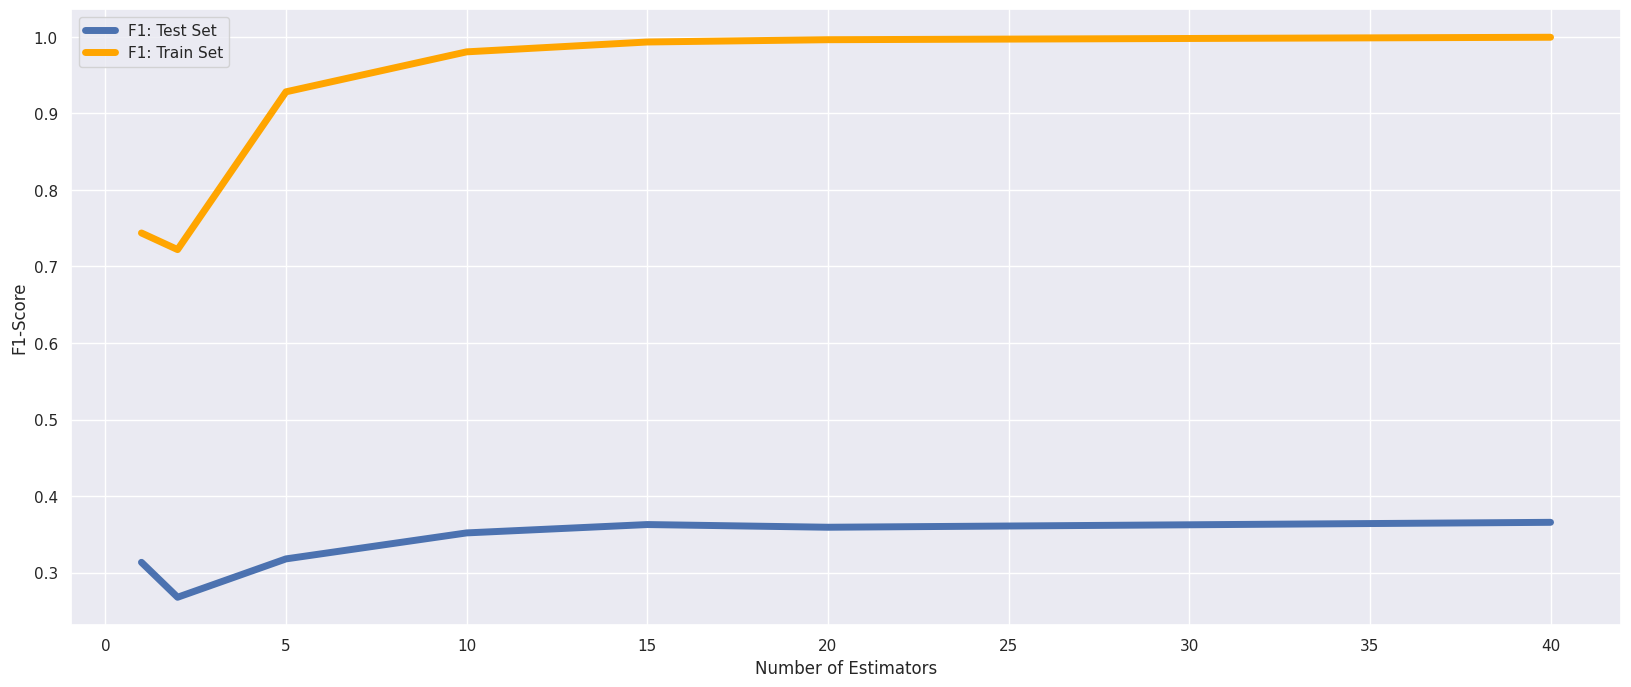

In [ ]:
scores = []
no_estimators = [1,2,5,10,15,20,40]
scores = []
scores_train = []
for no_estimator in no_estimators:

    # Create the model
    model = RandomForestClassifier(n_estimators=no_estimator)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_estimators,scores,lw=5)
plt.plot(no_estimators,scores_train,lw=5,color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


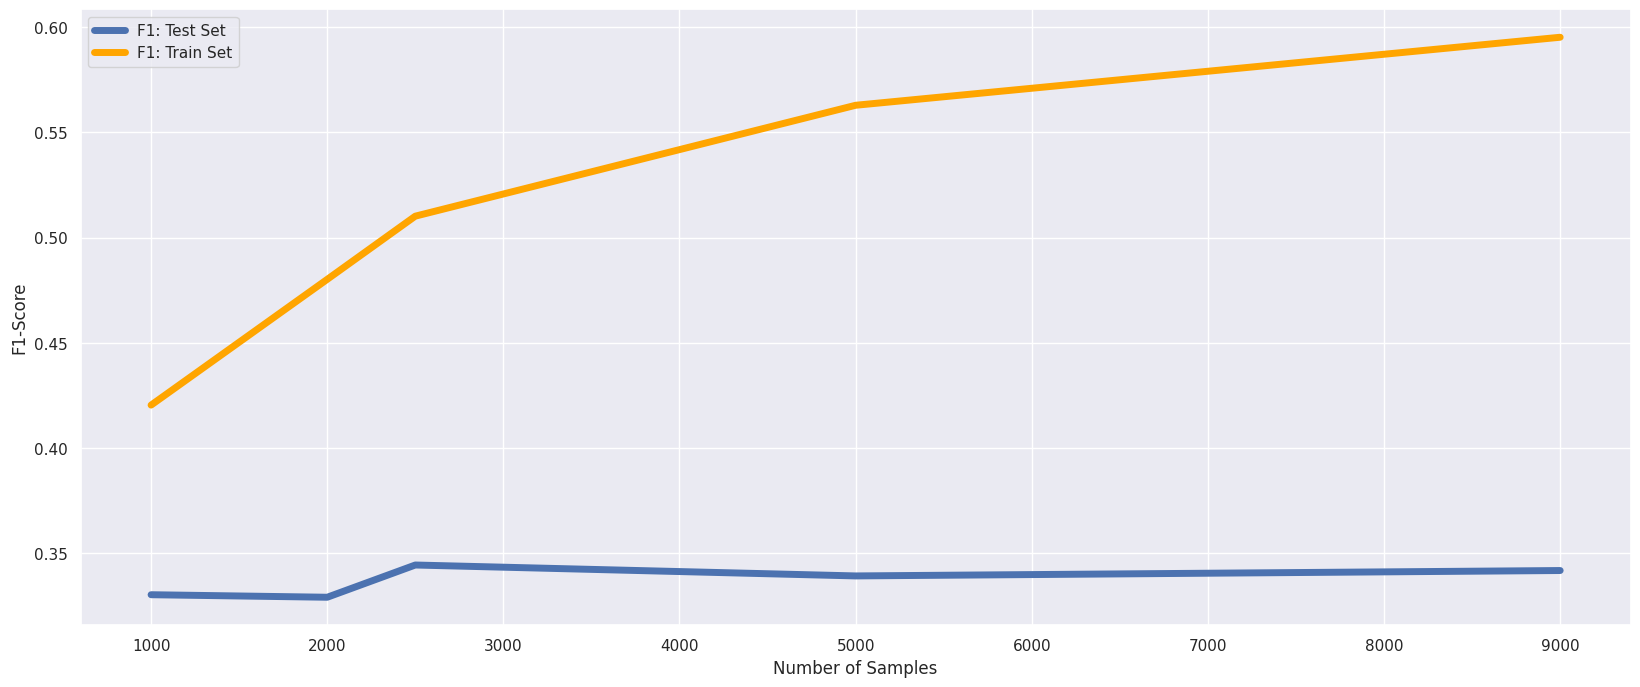

In [ ]:
scores = []
max_samples_list = [1000,2000,2500,5000,9000]
scores = []
scores_train = []
for max_samples in max_samples_list:

    # Create the model
    model = RandomForestClassifier(n_estimators=50,max_samples=max_samples,max_depth=10)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(max_samples_list,scores,lw=5)
plt.plot(max_samples_list,scores_train,lw=5,color='orange')
plt.xlabel('Number of Samples')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


# Boosting

### XGBoost
[XGBoost](https://xgboost.readthedocs.io/) is one of the most popular and powerful boosting algorithms available. It constructs multiple trees and combine their results to improve the performance of the whole algorithm. It also has options to speed up the whole process by using GPUs and parallilizing the tree construction.

However, using it in action is not any more difficult than using other classification algorithms we have seen so far.

But first, we need to do categorical encoding for labels (this is required for newer versions of XGBoos)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50)
model.fit(X_train, y_train,eval_metric=f1_score)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.39


As before, we can also investigate the effect of number of estimators (i.e. parallel trees) on the peformance of the algorithm:

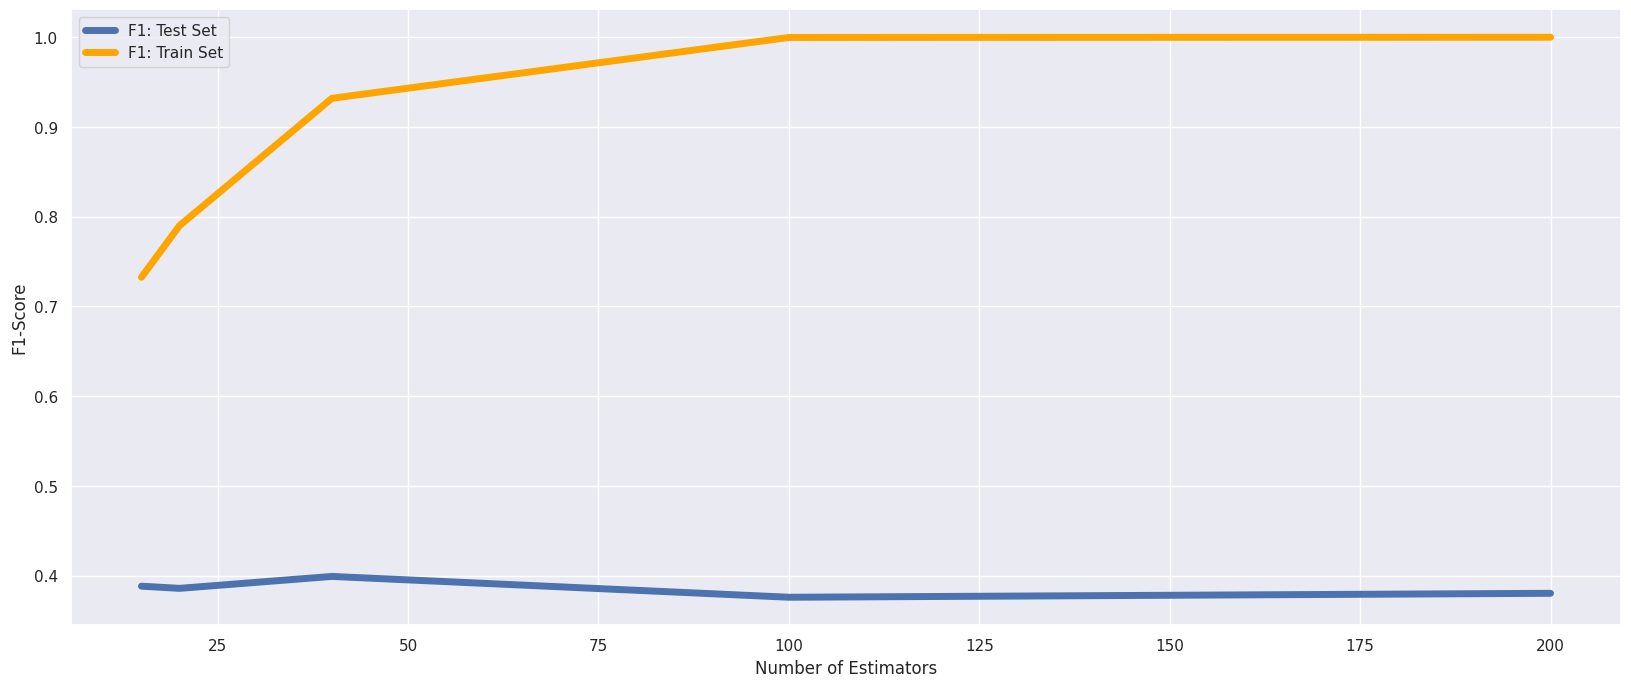

In [ ]:
scores = []
no_estimators = [15,20,40,100,200]
scores = []
scores_train = []
for no_estimator in no_estimators:

    # Create the model
    model = XGBClassifier(n_estimators=no_estimator)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_estimators,scores,lw=5)
plt.plot(no_estimators,scores_train,lw=5,color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


### Feature importance and model interpretibility
Similar to what we observed in decision trees and random forests, we can measure feature importance in XGBoost as well. This will also provide us with some insights about the most important aspects of the problem we are dealing with.

We can plot feature importance according to different meaures (code is borrowed from [this link](https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101)):

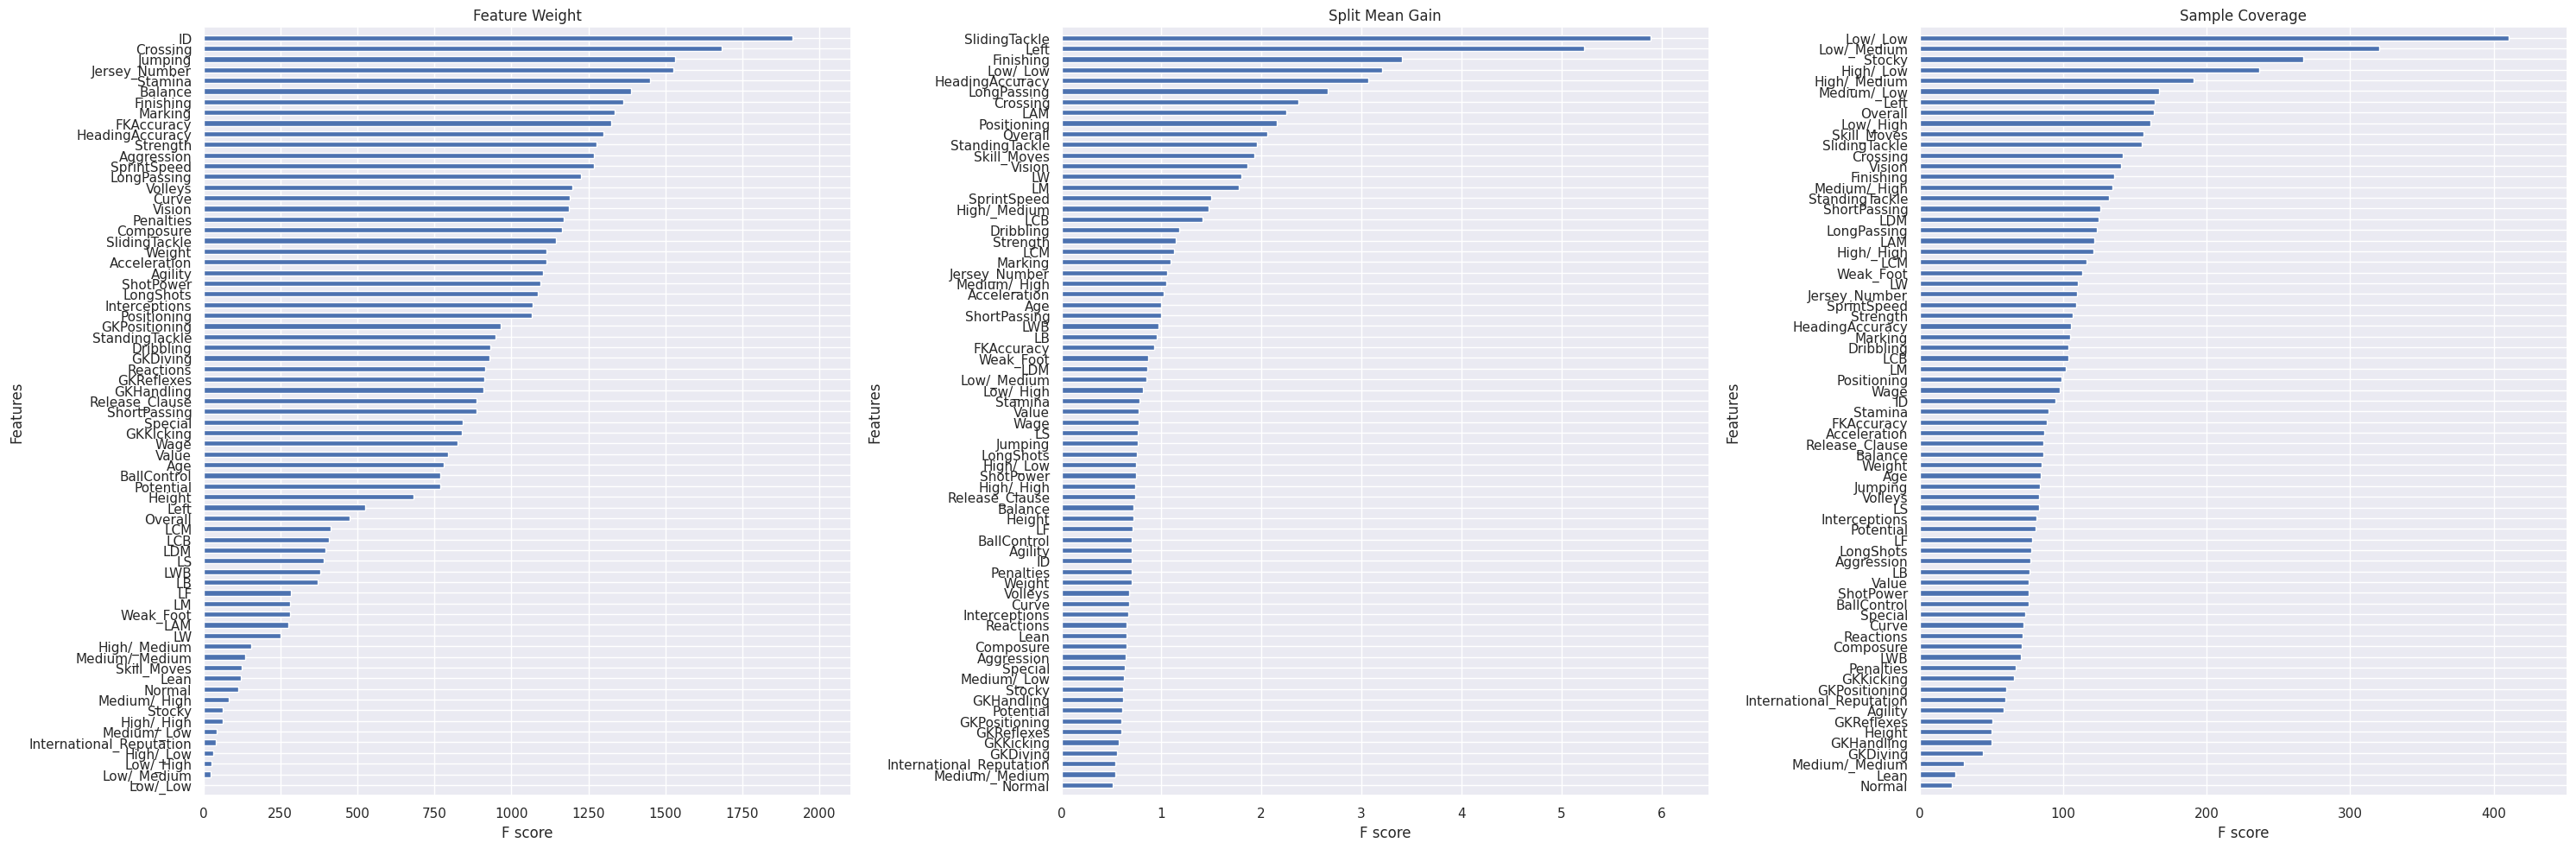

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(1, 3, figsize=(30,10))

# plot importances with feature weight
plot_importance(
    booster=model,
    importance_type='weight',
    title='Feature Weight',
    show_values=False,
    height=0.5,
    ax=ax[0],
)
# plot importances with split mean gain
plot_importance(
    booster=model,
    importance_type='gain',
    title='Split Mean Gain',
    show_values=False,
    height=0.5,
    ax=ax[1]
)
# plot importances with sample coverage
plot_importance(
    model,
    importance_type='cover',
    title='Sample Coverage',
    show_values=False,
    height=0.5,
    ax=ax[2]
)
plt.tight_layout()
plt.show()

### Visualizing the tree
Similar to other tree-based approaches, we can illustrate the decision tree.

The `num_trees` parameter defines the tree we want to illustrate.



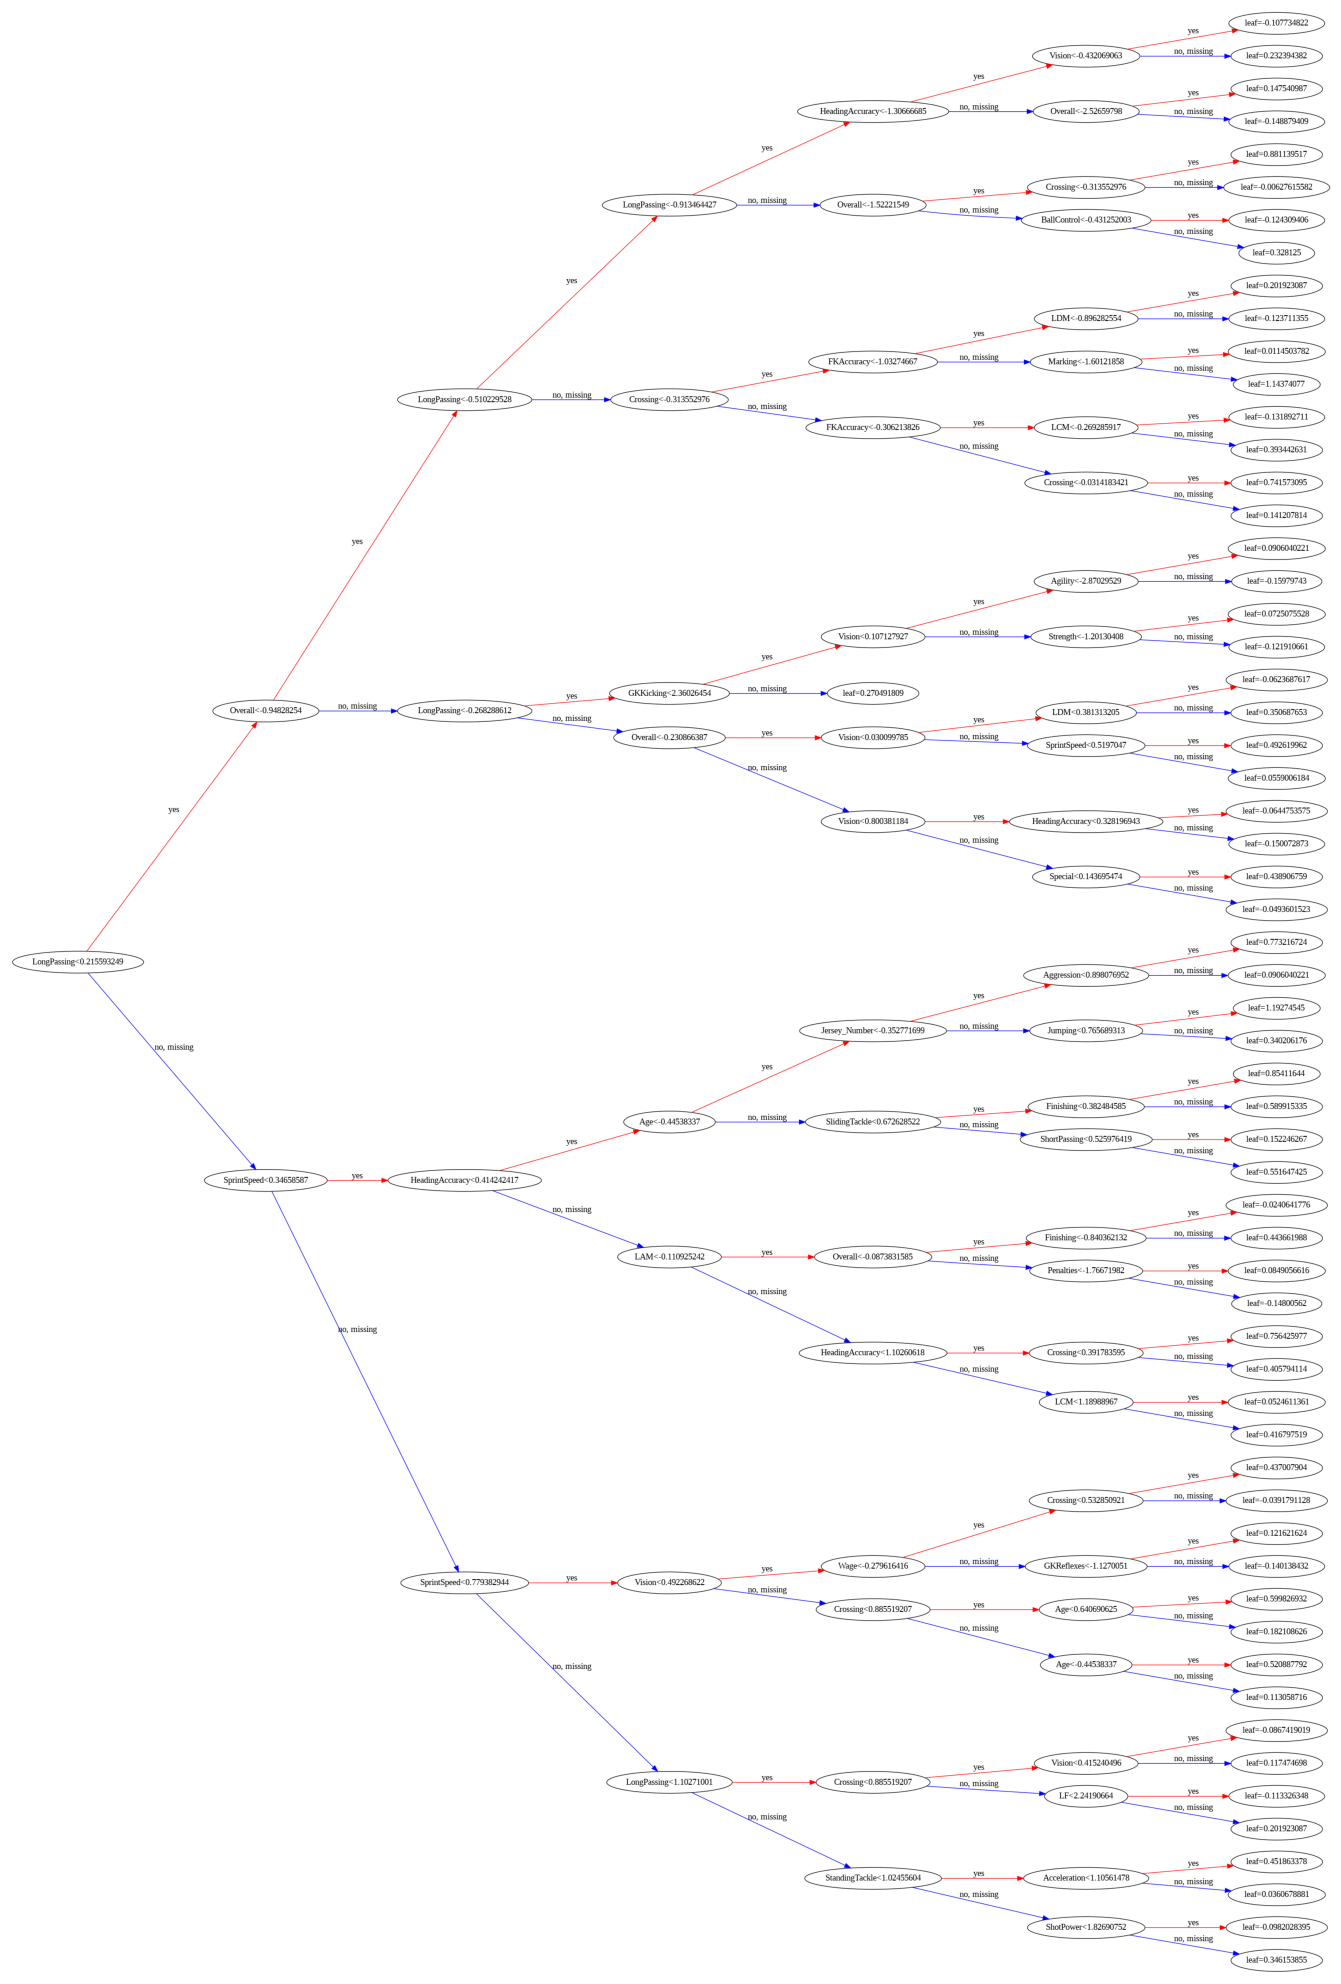

In [ ]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(20,20))
plot_tree(booster=model, num_trees=1, ax=ax, rankdir='LR')
plt.tight_layout()
plt.show()

#### Tuning XGBoost
XGBoost has a lot of parameters to tune, such as:

*   eta (a.k.a. learning_rate): Step size shrinkage used in update to prevents overfitting.
*   max_depth: maximum depth of the trees
*   subsample: fraction of the data that is randoly sampled and given to each tree
*   colsample_bytree: fraction of features to use when constructing each tree
*   lambda: L2 regularization term on weights

Here's a [complete list](https://xgboost.readthedocs.io/en/stable/parameter.html) of parameters.

We can do the tuning procedure manually, but another great way to do this is using GridSearch, checking all combinations. It takes a while but might worth it to get the best results. We will see more on this later in the course.

Aknowledgement: a lot of the code for this section is credited to [this link](https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create the grid search parameter grid and scoring funcitons
# Credit: https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
param_grid = {
    "eta": [0.1, 0.01],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2,5,10],
    "n_estimators": [50,100,200],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3,0.6],
}

n_iter=50
grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    #cv=kfold,
    #scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)
# fit grid search
%time best_model = grid.fit(X_train,y_train)

CPU times: user 1min 23s, sys: 4.72 s, total: 1min 28s
Wall time: 29min 54s


In [ ]:
predictions = best_model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.37


In [ ]:
print('Max depth is: %d ' %best_model.best_estimator_.max_depth)
print('Gamma is: %.2f '  %best_model.best_estimator_.gamma)

Max depth is: 10 
Gamma is: 0.30 


### LightGBM
LightGBMs are another family of boosting algorithms, tailored for speed and dealing with large data.

Using LightGBM in practice very similar to using other boosting algorithms:

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
model.fit(X_train,y_train,eval_metric=f1_score) #'logloss')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5151
[LightGBM] [Info] Number of data points in the train set: 9397, number of used features: 87
[LightGBM] [Info] Start training from score -1.981108
[LightGBM] [Info] Start training from score -1.587545
[LightGBM] [Info] Start training from score -1.489446
[LightGBM] [Info] Start training from score -3.253743
[LightGBM] [Info] Start training from score -4.296116
[LightGBM] [Info] Start training from score -2.240390
[LightGBM] [Info] Start training from score -2.215698
[LightGBM]

LGBMClassifier(learning_rate=0.09, max_depth=10)

In [ ]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Macro F1-score is 0.38


#### Feature Importances

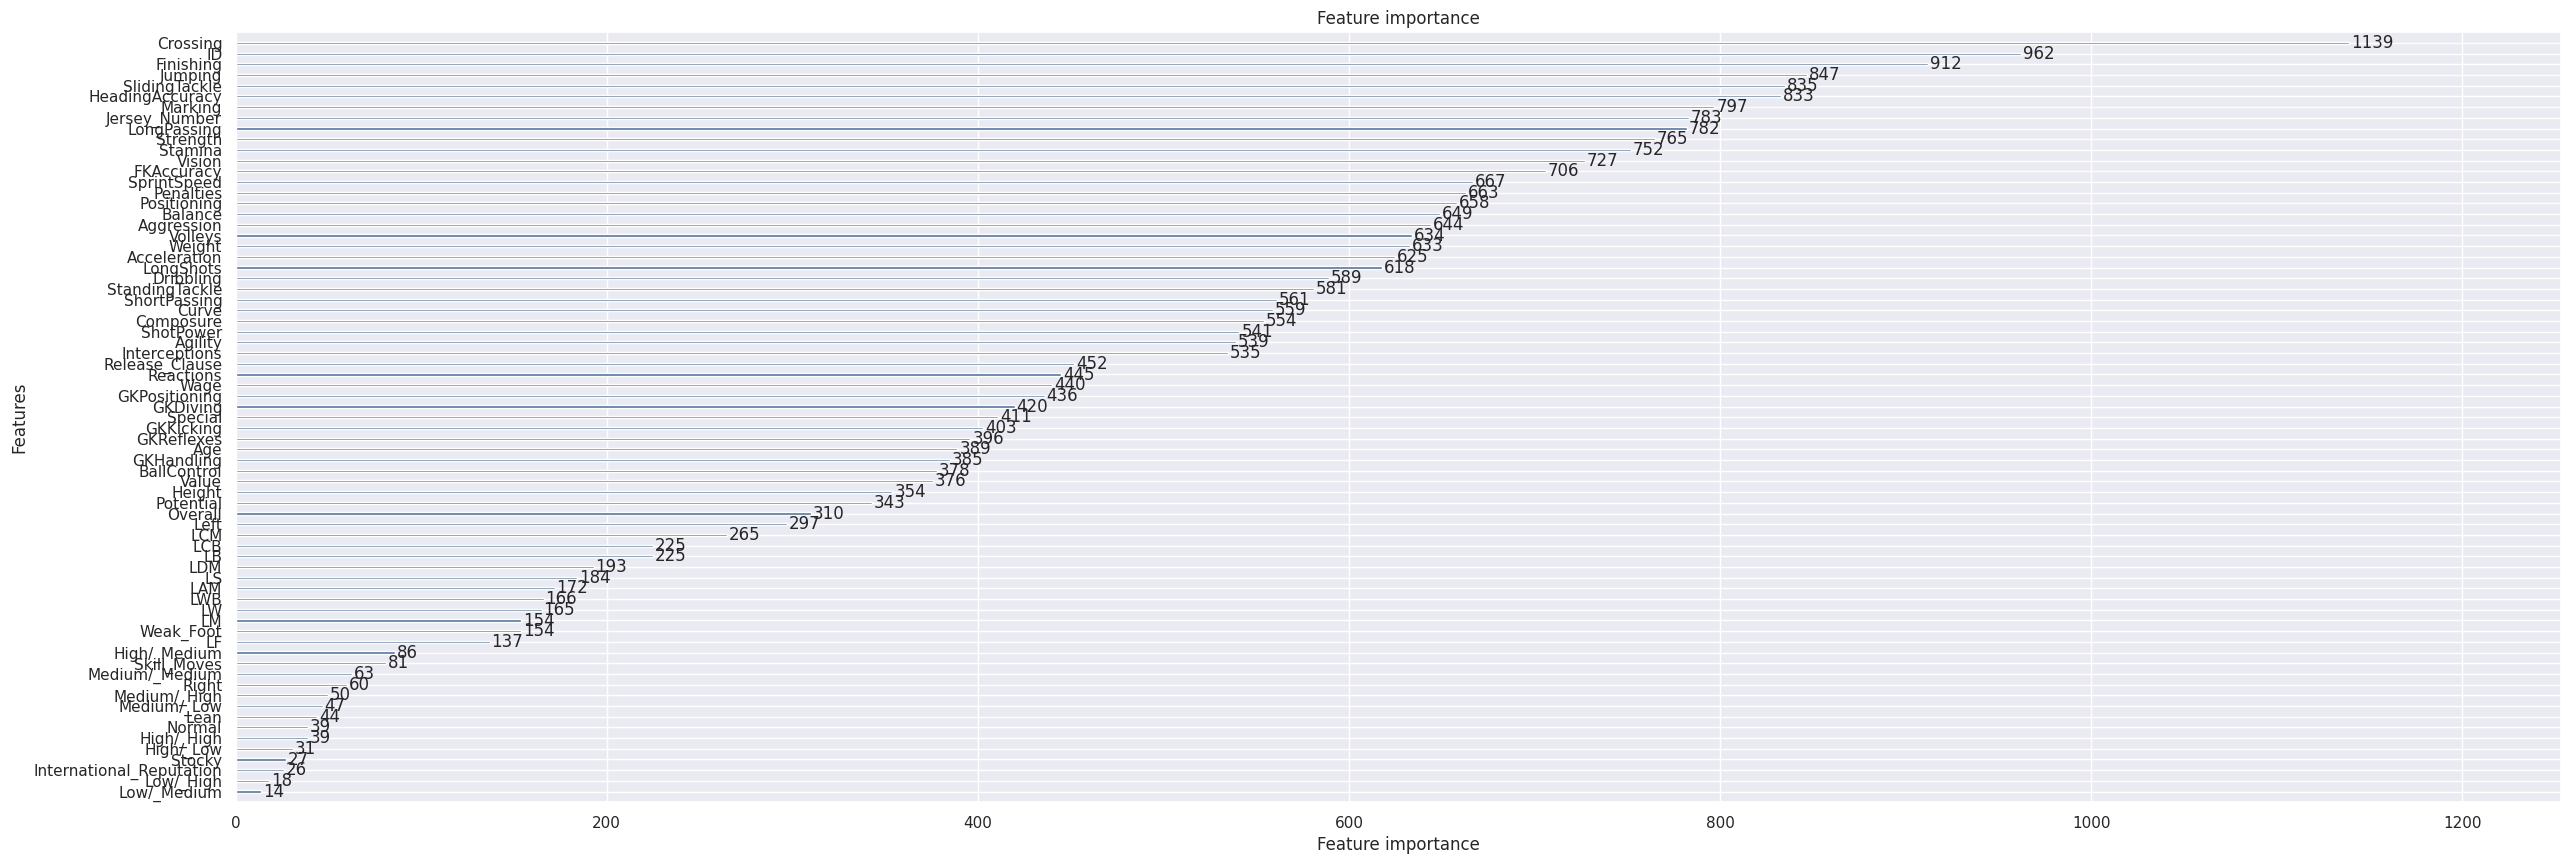

In [ ]:
from lightgbm import plot_importance

fig,ax = plt.subplots(figsize=(30,10))

# plot importances with feature weight
plot_importance(
    booster=model,
    ax=ax
)

#plt.tight_layout()
plt.show()

### Visualizing the tree
Similar to other tree-based approaches, we can illustrate the decision tree.

The `tree_index` parameter defines the tree we want to illustrate.



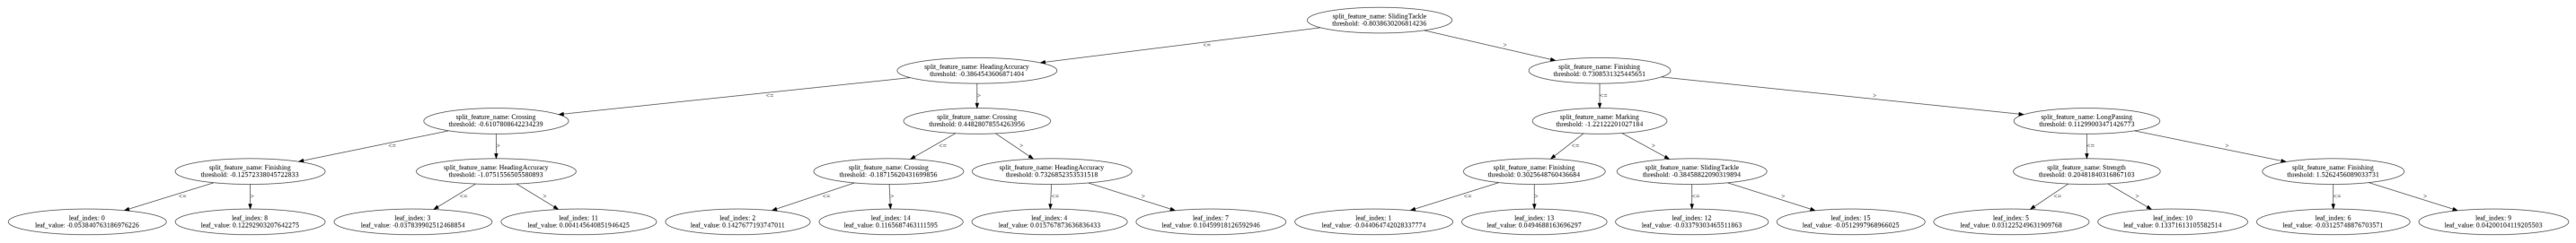

In [ ]:
from lightgbm import plot_tree
fig, ax = plt.subplots(figsize=(40,20))
plot_tree(booster=model, tree_index=10,ax=ax)
plt.tight_layout()
plt.show()

The confusion matrix for our classifier is:

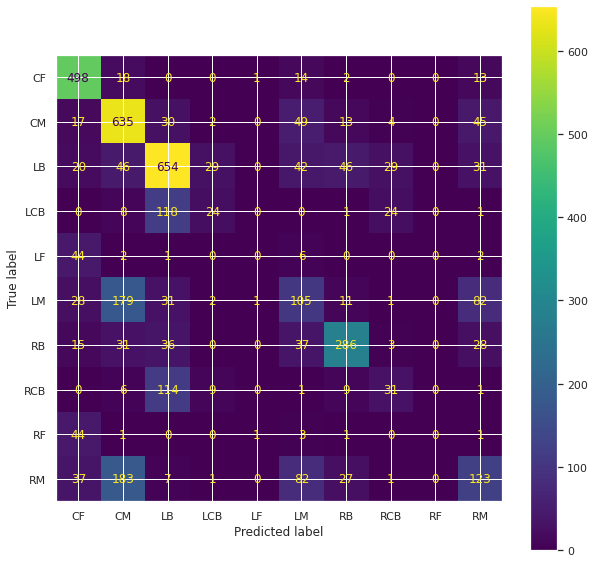

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test,ax=ax)
plt.show()

### CatBoost
[CatBoost](https://catboost.ai/en/docs/concepts/python-usages-examples) is another boosting algorithm. It is especially desirable because of its faster *prediction* times, so if we are dealing with a problem which requires fast prediction in practice, it should be contender.

Let's see how it performs on our dataset:

In [ ]:
# First, let's install catboost as it does not comes standard in Google Colab
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                          learning_rate=.3,
                          depth=5,
                          verbose=False,
                          )

In [ ]:
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.39


Seems to be a competetive result!

## Hierarchical Classification
Maybe we can do better if we first classifiy the "role" of the player (e.g. if he/she is an attacker, middfielder, etc.).

Then, we can train 3 separate classifiers:

*   Classifier D: train on all players whose "role" is defense, and predict their actual "position"
*   Classifier M: train on all players whose "role" is midfield, and predict their actual "position"
*   Classifier F: train on all players whose "role" is attack, and predict their actual "position"

Let's see if this help us improve our accuracy.

First, let's put back the position column which we removed from our dataset

In [ ]:
df['Position'] = target_positions

In [ ]:
df['Position'].unique()

array(['RF', 'CF', 'LB', 'RM', 'LF', 'RCB', 'LM', 'CM', 'LCB', 'RB'],
      dtype=object)

Now, let's create the "role" as a new column in our dataset:

In [ ]:
df['Role'] = target_positions

# Defense
df.loc[df['Position'].isin(['LB','RCB','LCB','RB','CB']),'Role']='D'

# Midfield
df.loc[df['Position'].isin(['RM','LM','CM']),'Role']='M'

# Attack
df.loc[df['Position'].isin(['RF','CF','LF']),'Role']='F'

In [ ]:
df['Role'].unique()

array(['F', 'D', 'M'], dtype=object)

Now, in order to demonstrate how the new approach works, let's just create a new dataset containing only defenders:

In [ ]:
df_defenders = df[df['Role']=='D']
df_defenders.shape

(6101, 97)

In [ ]:
roles = df.pop('Role')

Our first goal would be to train a classifier to just predict the correct "role". Let's do that by seeting our target variable to the "role" column, and split the dataset into train and test sets.

In [ ]:
y = roles
df.pop('Position')
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(df,y,df.index,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(10320, 95)
(4423, 95)


Now let's train an XGBoost instance, to identify the "role" of all players:

In [ ]:
model_role = XGBClassifier(n_estimators=150,gamma=0.3,subsample=0.8,max_depth=5,colsample_bytree=0.8)
model_role.fit(X_train, y_train,eval_metric=f1_score)

XGBClassifier(colsample_bytree=0.8, gamma=0.3, max_depth=5, n_estimators=150,
              objective='multi:softprob', subsample=0.8)

In [ ]:
predictions_role = model_role.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions_role, average='macro'))

Macro F1-score is 0.87


Great! we have a rather high F1-score, which is as expected, since we have reduced the number of our classes.

Now let's train a new classifier, to predict the "position" of all players whose role is defense, i.e. the defenders!

In [ ]:
y_defenders = df_defenders.pop('Position')
df_defenders.pop('Role')
X_train_defenders, X_test_defenders, y_train_defenders, y_test_defenders = train_test_split(df_defenders,y_defenders,test_size=0.3)
print(X_train_defenders.shape)
print(X_test_defenders.shape)

(4270, 95)
(1831, 95)


In [ ]:
y_defenders.unique()

array(['LB', 'RCB', 'LCB', 'RB'], dtype=object)

Now, let's focus on the defnders as an example:

In [ ]:
model_defenders = XGBClassifier(n_estimators=150,gamma=0.3,subsample=0.8,max_depth=5,colsample_bytree=0.8)
model_defenders.fit(X_train_defenders, y_train_defenders,eval_metric=f1_score)

XGBClassifier(colsample_bytree=0.8, gamma=0.3, max_depth=5, n_estimators=150,
              objective='multi:softprob', subsample=0.8)

In [ ]:
predictions_position = model_defenders.predict(X_test_defenders)
print('Macro F1-score is %.2f' %f1_score(y_test_defenders, predictions_position, average='macro'))

Macro F1-score is 0.50


F1-score is a bit lower than the previous case, but we have more classes. So it is ok.

We now have all the ingredients we need :)

So our next steps would be to pick data from the test set of the first classifier (i.e. the one predicting the role), and then:   


1.   Predict the role of the players in this dataset
2.   For all players whose role have been predicted to be defenders, predict their position using the second classifier
3.   Compare the predicted positions to the actual ones, and calculate the F1-score



In [ ]:
predictions_role = model_role.predict(X_test)

Now pick all those the algorithm has identified as defenders:

In [ ]:
predicted_defenders = predictions_role[predictions_role=='D']

Now let's predict the actual position of these players:

In [ ]:
inds = np.where(predictions_role=='D')
X_predicted_defenders = X_test.iloc[inds]
y_predicted_defenders = target_positions[indices_test].iloc[inds]

Finally, let's measure the accuracy of our predictions:

In [ ]:
predictions_position = model_defenders.predict(X_predicted_defenders)
print('Macro F1-score is %.2f' %f1_score(y_predicted_defenders, predictions_position, average='macro'))

Macro F1-score is 0.33


Which is better than the previous algorithms we have seen so far.

**BUT**, in order to be sure, we have to repeat this step for all players in the remaining roles, gather the results, and calculate the overall F1-Score, hopefully it is higher than what we have achieved.

# Fun Notebook
If you are interested in football, or at least applications of data science in football, [this notebook](https://www.kaggle.com/jaseziv83/clustering-to-help-club-managers) is very fun! It tries to provide some nice insight on the players, and maybe help managers discover hidden gems!

Any Final Thoughts?

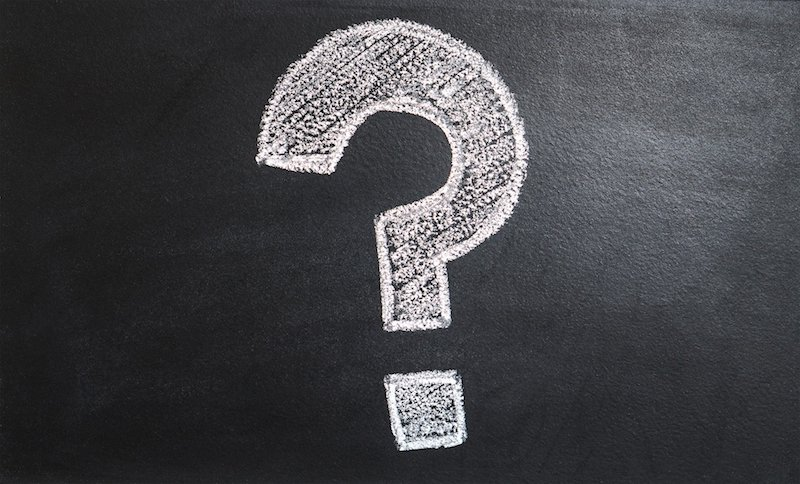

# Don't Forget the Survey!
Please help us improve the quality of the lab sessions by filling this [short suvery](https://forms.gle/SfcdyMdBayGeHva68) about today's session.


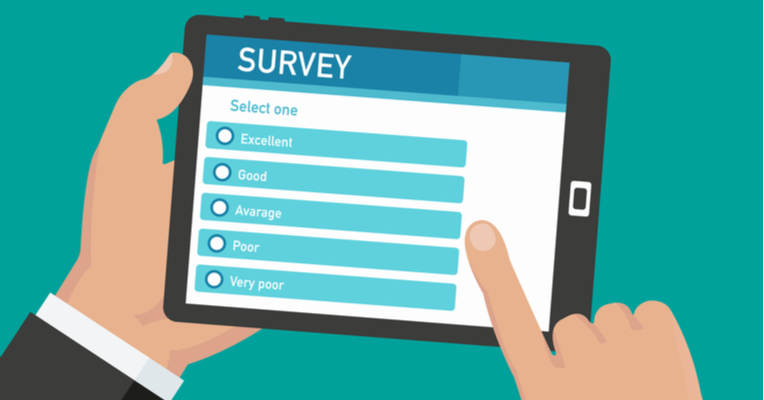